In [1]:
%matplotlib inline
from glob import glob
import skimage.io as skio

""" plot support packages """
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

""" statistical data visualization packages"""
import seaborn as sns

""" seaborn configurations """
sns.set_style('white')
sns.set_context('talk')
plt.rcParams['figure.figsize'] = 20, 10

In [2]:
from funcoes import apply_filter, plot_captchas, quebra_captcha, modela_captcha

In [3]:
# Qual versão de filtro foi usada? 1, 2 ou 3?
v = 2
validation = True
plot = True

In [4]:
if validation:
    captchas_files = sorted(glob('../testes/captcha_teste*.png'))
else:
    captchas_files = sorted(glob('../imagens/captcha*.png'))

imgs = skio.imread_collection(captchas_files[0:20])

In [5]:
unblobbed = [apply_filter(img, v) for img in imgs]

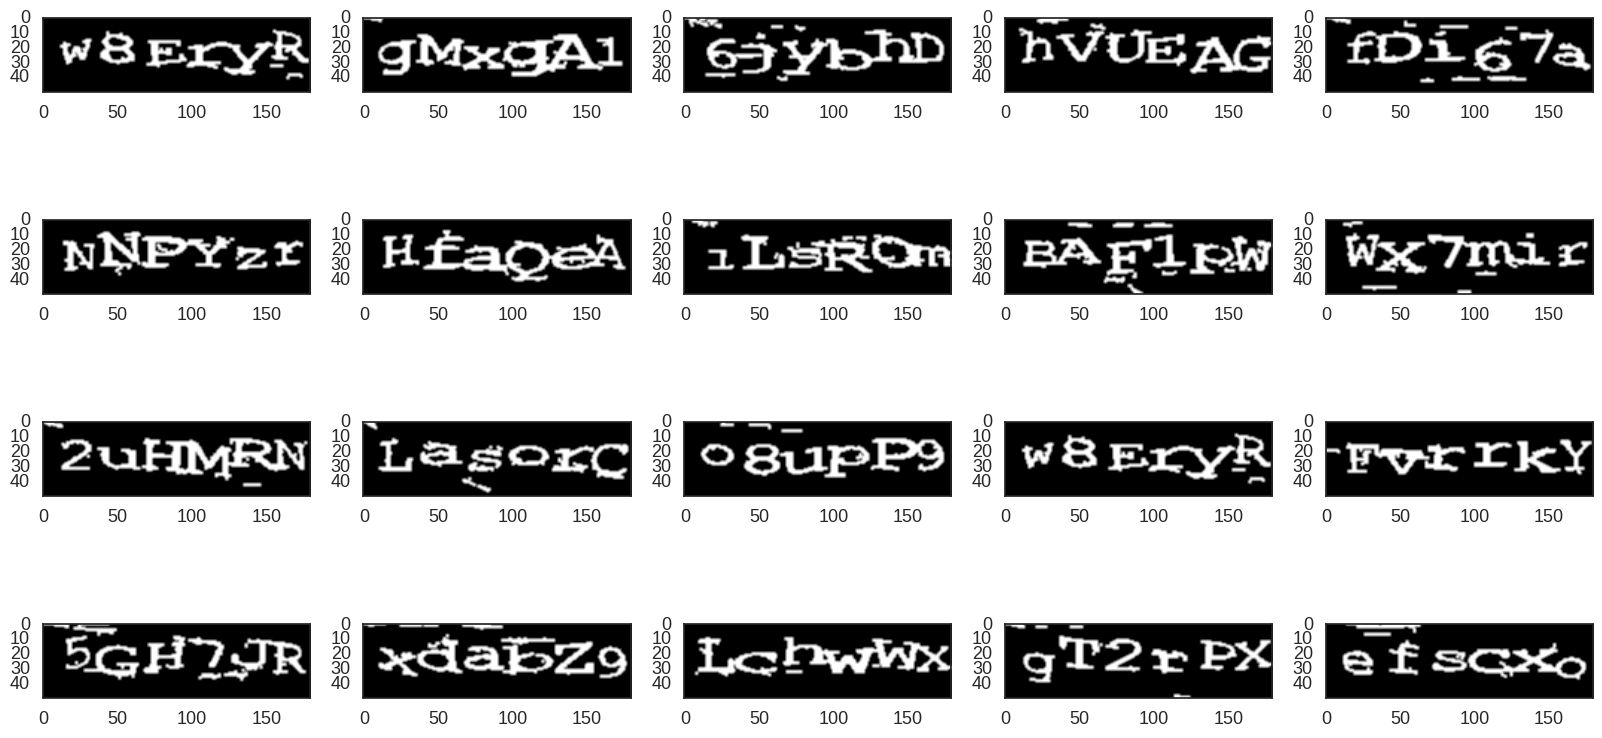

In [6]:
if plot: plot_captchas( unblobbed, (4, 5) )

In [7]:
if validation:
    certo = ['w8EryR', 'gMxgA1', '6jybhD', 'hVUEAG', 'fDi67a',
            'NNPYzr', 'HfaQeA', 'iLsROm', 'BAF1pW', 'Wx7m1r',
            '2uHMRN', 'Lasorc', 'o8upp9', 'w8EryR', 'FvrrkY',
            '5GH7JR', 'xdabZ9', 'Lchwwx', 'gT2rPX', 'efsCXo']
else:
    certo = ['vvpjk9', 'twv6bg', 'gzy6gb', '8qgscq', 'srsllo',
            'k32fsx', 'nhheeb', 'qqb5dl', 'wsswor', 'gsiaam',
            'emkiyl', 'juas7l', 'iapfk3', '4mvbye', '6dzmjz',
            'aytsq1', 'v9ekk1', '9pc3ze', '9ogv3a', 'wnahxu']

# Tentativa com modelo ML

## Balanced

In [8]:
%%time
%%capture
respostasML1 = []

for i, captcha in enumerate(unblobbed):
    resposta = modela_captcha(captcha, tipo = "image", feat_transform = 'lbp')
    respostasML1.append(resposta)

CPU times: user 1min 2s, sys: 3.02 s, total: 1min 5s
Wall time: 1min 13s


In [9]:
print(respostasML1)

['v8eryk', 'gmega1', 'gjvnnc', 'nvvcan', 'tvpn7a', 'shhysy', 'kfspea', '1tsmcn', 'saf1pw', 'nk7p1c', '1uhvhe', 'tnsorq', 'oenpfs', 'v8eryk', 'fvrtnv', 'neh7ja', 'xdabem', 'lrnwka', 'jt2rvv', 'etssxa']


In [10]:
ML1 = []

for i, captcha in enumerate(certo):
    
    ML1.append(0)
    for j, letra in enumerate(captcha):  
        if (letra.lower() == respostasML1[i][j].lower()):
            ML1[i] += 1

In [11]:
print(ML1)

[4, 5, 1, 2, 2, 1, 3, 1, 5, 2, 2, 3, 2, 4, 3, 3, 4, 2, 3, 3]


In [12]:
print("pontos totais: " + str(sum(ML1)/(20*6)))

pontos totais: 0.4583333333333333


# Tentativa com funções super_score

In [13]:
%%time
%%capture
#respostasSS = []
#v = 6 # super score possui 6 versões até o momento (6 é a mais nova)
#for i, captcha in enumerate(unblobbed):
#    resposta = quebra_captcha(captcha, v)
#    #print("resposta "+ str(i) + ": " + resposta)
#    respostasSS.append(resposta)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 5.65 ms


In [14]:
#print(respostasSS)

In [15]:
#super_score = []
#for i, captcha in enumerate(certo):

#    super_score.append(0)
#    for j, letra in enumerate(captcha):
#        if (letra.lower() == respostasSS[i][j].lower()):
#            super_score[i] += 1

In [16]:
#print(super_score)

In [17]:
#print("pontos totais: " + str(sum(super_score)/(20*6)))

# Tentativa com Tesseract

In [18]:
#%%time
#%%capture
#respostasTS = []
#for i, captcha in enumerate(unblobbed):
#    resposta = tsrct_captcha(captcha)
#    #print("resposta "+ str(i) + ": " + resposta)
#    respostasTS.append(resposta)

In [19]:
#print(respostasTS)

In [20]:
#tesseract = []

#for i, captcha in enumerate(certo):

    #tesseract.append(0)    
    #for j, letra in enumerate(captcha):
        #if (letra == respostasTS[i][j]):
        #    tesseract[i] += 1

In [21]:
#print(tesseract)

In [22]:
#print("pontos totais: " + str(sum(tesseract)/(20*6)))

# Conclusão

Técnica ____________ obteve melhores resultados na previsão.